In [1]:
import numpy as np
import xroms
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
import warnings
import sys
import xrft
# import seaborn as sns
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle
import matplotlib.colors as colors

from dask.diagnostics import ProgressBar
import dask
# dask.config.set(**{'array.slicing.split_large_chunks': True})
from dask.distributed import Client, LocalCluster

import scipy.integrate as integ
warnings.filterwarnings("ignore")


import seawater as sw

In [2]:
# client = Client(n_workers=90)
# # client = Client(cluster)

client = Client(n_workers=30,processes=True)
client

distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubmeso/notebooks/TFB_NIW_proposal/dask-worker-space/worker-k1uin6ew', purging
distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubmeso/notebooks/TFB_NIW_proposal/dask-worker-space/worker-flvwq51w', purging
distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubmeso/notebooks/TFB_NIW_proposal/dask-worker-space/worker-72jopwe6', purging
distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubmeso/notebooks/TFB_NIW_proposal/dask-worker-space/worker-ld49_4v6', purging
distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubmeso/notebooks/TFB_NIW_proposal/dask-worker-space/worker-lokuu6_n', purging
distributed.diskutils - INFO - Found stale lock file and directory '/homes/metogra/iufarias/FeedbackSubme

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 30
Total threads: 150,Total memory: 502.98 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45659,Workers: 30
Dashboard: http://127.0.0.1:8787/status,Total threads: 150
Started: Just now,Total memory: 502.98 GiB
Comm: tcp://127.0.0.1:41647,Total threads: 5
Dashboard: http://127.0.0.1:44821/status,Memory: 16.77 GiB
Nanny: tcp://127.0.0.1:34961,


## Reading CROCO (3D)

In [15]:
# chunks={'time_counter':1,'x_rho':1000,"x_u":1000,"x_v":1000,
#                         'y_rho':1520,"y_u":1520,"y_v":1520,'s_rho':80,'s_w':80}

chunks={'time_counter':1}

path='/data/pacific/lrenault/SASI/CROCO/'
file_list_full=glob(path + 'FULL/surf_SASI_6h_his_2012_0*')[:-1]
file_list_smth=glob(path + 'SMTH/surf_SASI_6h_his_2012_0*')[:-1]


df=xr.open_mfdataset(file_list_full,data_vars='minimal',chunks=chunks)
dt=xr.open_mfdataset(file_list_smth,data_vars='minimal',chunks=chunks)

Converting to xroms

In [16]:

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [17]:
timer_h=pd.DatetimeIndex(dt.time_counter)
timer_d=pd.DatetimeIndex(dt.time_counter.groupby("time_counter.dayofyear").mean())

# Loading data

In [40]:
%%time
u_full_time=df.u[:,:,:][:,120:-120,120:-200].compute()
v_full_time=df.v[:,:,:][:,120:-120,120:-200].compute()

CPU times: user 22.7 s, sys: 10.8 s, total: 33.5 s
Wall time: 1min 42s


In [41]:
%%time
u_smth_time=dt.u[:,:,:][:,120:-120,120:-200].compute()
v_smth_time=dt.v[:,:,:][:,120:-120,120:-200].compute()

CPU times: user 18.6 s, sys: 9.28 s, total: 27.9 s
Wall time: 1min 29s


### Interpolating

In [62]:
v_smth_int=0.5*(v_smth_time[:,:,:-1] + v_smth_time[:,:,1:])
u_smth_int=0.5*(u_smth_time[:,1:,:] + u_smth_time[:,:-1,:])


In [49]:
v_full_int=0.5*(v_full_time[:,:,:-1] + v_full_time[:,:,1:])
u_full_int=0.5*(u_full_time[:,1:,:] + u_full_time[:,:-1,:])


(728, 1279, 679)

In [51]:
# %%time
# taux_full_time=df.sustr.xroms.to_grid('psi')[:,120:-120,120:800].compute()
# tauy_full_time=df.svstr.xroms.to_grid('psi')[:,120:-120,120:800].compute()


# taux_smth_time=dt.sustr.xroms.to_grid('psi')[:,120:-120,120:800].compute()
# tauy_smth_time=dt.svstr.xroms.to_grid('psi')[:,120:-120,120:800].compute()

In [52]:
nf=4
wdws='hann' #'flattop','hann'
wdw_cor=True
phase_bol=False
truncate_bol=True

In [53]:
# %%time
# tau_u_full_spec=xrft.cross_spectrum(taux_full_time.drop(['time_instant','ocean_time']),
#                     u_full_time.drop(['time_instant','ocean_time']),
#                     dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# tau_v_full_spec=xrft.cross_spectrum(tauy_full_time.drop(['time_instant','ocean_time']),
#                     v_full_time.drop(['time_instant','ocean_time']),
#                     dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)


# tau_u_smth_spec=xrft.cross_spectrum(taux_smth_time.drop(['time_instant','ocean_time']),
#                     u_smth_time.drop(['time_instant','ocean_time']),
#                     dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)


# tau_v_smth_spec=xrft.cross_spectrum(tauy_smth_time.drop(['time_instant','ocean_time']),
#                     v_smth_time.drop(['time_instant','ocean_time']),
#                     dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# # ww_full_spec=(1/1024)*(tau_u_full_spec + tau_v_full_spec)
# # ww_smth_spec=(1/1024)*(tau_u_smth_spec + tau_v_smth_spec)

# ww_full_spec=(tau_u_full_spec + tau_v_full_spec)
# ww_smth_spec=(tau_u_smth_spec + tau_v_smth_spec)

# ww_iso_full=xrft.isotropize(ww_full_spec,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)
# ww_iso_smth=xrft.isotropize(ww_smth_spec,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)


### EKE FULL

In [67]:
# u_spec_full=xrft.power_spectrum(u_full_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# v_spec_full=xrft.power_spectrum(v_full_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# u_iso_full=xrft.isotropize(u_spec_full,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)
# v_iso_full=xrft.isotropize(v_spec_full,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)


### EKE SMTH

In [54]:
# u_spec_smth=xrft.power_spectrum(u_smth_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# v_spec_smth=xrft.power_spectrum(v_smth_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# u_iso_smth=xrft.isotropize(u_spec_smth,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)
# v_iso_smth=xrft.isotropize(v_spec_smth,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)


In [55]:
# EKE_spec_full=0.5*(u_iso_full+v_iso_full)
# EKE_spec_smth=0.5*(u_iso_smth+v_iso_smth)


### Wind Stress

In [56]:
# %%time
# taux_spec_full=xrft.power_spectrum(taux_full_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# tauy_spec_full=xrft.power_spectrum(tauy_full_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# taux_spec_smth=xrft.power_spectrum(taux_smth_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)

# tauy_spec_smth=xrft.power_spectrum(tauy_smth_time.drop(['time_instant','ocean_time'])
#                 ,dim=['eta_v','xi_u','ocean_time'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
#                                      window=wdws,window_correction=wdw_cor)



# tau_iso_full=xrft.isotropize(taux_spec_full + tauy_spec_full,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)
# tau_iso_smth=xrft.isotropize(taux_spec_smth + tauy_spec_smth,fftdim=['freq_xi_u','freq_eta_v'],nfactor=nf,complx=False)


Text(0.5, 0, 'Wavenumber [cpm]')

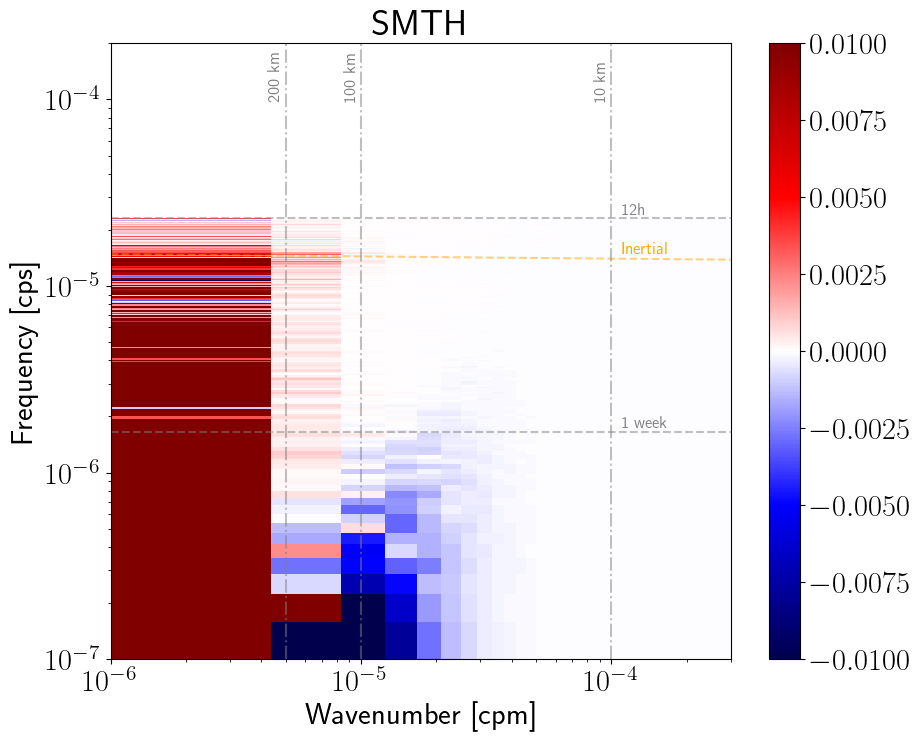

In [46]:
val_min=-1e-2
val_max=1e-2
dxx=500;xmin=1e-6;xmax=3e-4;ymax=2e-4;ymin=1e-7
# dxx=0.5;xvmin=1e-3;xmax=8e-1

plt.figure(figsize=(10,8))
# plt.pcolormesh(ww_iso_smth.freq_r/dxx,ww_iso_smth.freq_ocean_time/dtt,
#                 ww_iso_smth.real,cmap='seismic',
#                norm=colors.SymLogNorm(linthresh=1e-3,vmin=val_min,vmax=val_max, base=10))

plt.pcolormesh(ww_iso_smth.freq_r/dxx,ww_iso_full.freq_ocean_time/dtt,
                ww_iso_smth.real,cmap='seismic',vmin=val_min,vmax=val_max)

'Lines for f'
plt.plot([xmin,xmax],[sw.f(df.nav_lat_rho.mean()/(2*np.pi)),sw.f(df.nav_lat_rho.mean())/(2*np.pi)],
         color='orange',linestyle='--',alpha=0.5)
plt.text(1.1e-4,sw.f(df.nav_lat_rho.mean())/(2*np.pi)+1e-6,
         r'Inertial',color='orange',fontsize=12)
plt.plot([xmin,xmax],[1/(12*60*60),1/(12*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(12*60*60)+1e-6,
         r'12h',color='gray',fontsize=12)
plt.plot([xmin,xmax],[1/(24*7*60*60),1/(24*7*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(24*7*60*60)+1e-7,
         r'1 week',color='gray',fontsize=12)


'Lines for kh'

plt.plot([(1e-4),(1e-4)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-5,1e-4,r'10 km',color='gray',fontsize=12,rotation=90)

plt.plot([(1e-5),(1e-5)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-6,1e-4,r'100 km',color='gray',fontsize=12,rotation=90)


plt.plot([(1/(200*1e3)),(1/(200*1e3))],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(1/(200*1e3) -0.75e-6,1e-4,r'200 km',color='gray',fontsize=12,rotation=90)


# plt.plot([xmin,xmax],[1/(24*7*60*60),1/(24*7*60*60)],
#          color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--')
# plt.text(1e-4,1/(24*7*60*60)+1e-7,
#          r'1 week',color='gray',fontsize=12)


plt.title('SMTH')
plt.colorbar()

plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.ylabel(r'Frequency [cps] ')
plt.xlabel(r'Wavenumber [cpm]')


# Divergence

In [63]:
dxx=500
sigma_full=u_full_int.differentiate('x_u')/dxx + v_full_int.differentiate('y_v').data/dxx
sigma_smth=u_smth_int.differentiate('x_u')/dxx + v_smth_int.differentiate('y_v').data/dxx

f_bar=sw.f(vart.nav_lat_rho.mean())

In [64]:
sigma_full_spec=xrft.power_spectrum(sigma_full.drop(['time_instant']),
                    dim=['y_u','x_u','time_counter'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
                                     window=wdws,window_correction=wdw_cor)


sigma_smth_spec=xrft.power_spectrum(sigma_smth.drop(['time_instant']),
                    dim=['y_u','x_u','time_counter'],scaling=sclstr,true_phase = phase_bol,truncate=truncate_bol, 
                                     window=wdws,window_correction=wdw_cor)

sigma_iso_full=xrft.isotropize(sigma_full_spec,fftdim=['freq_x_u','freq_y_u'],nfactor=nf,complx=False)
sigma_iso_smth=xrft.isotropize(sigma_smth_spec,fftdim=['freq_x_u','freq_y_u'],nfactor=nf,complx=False)

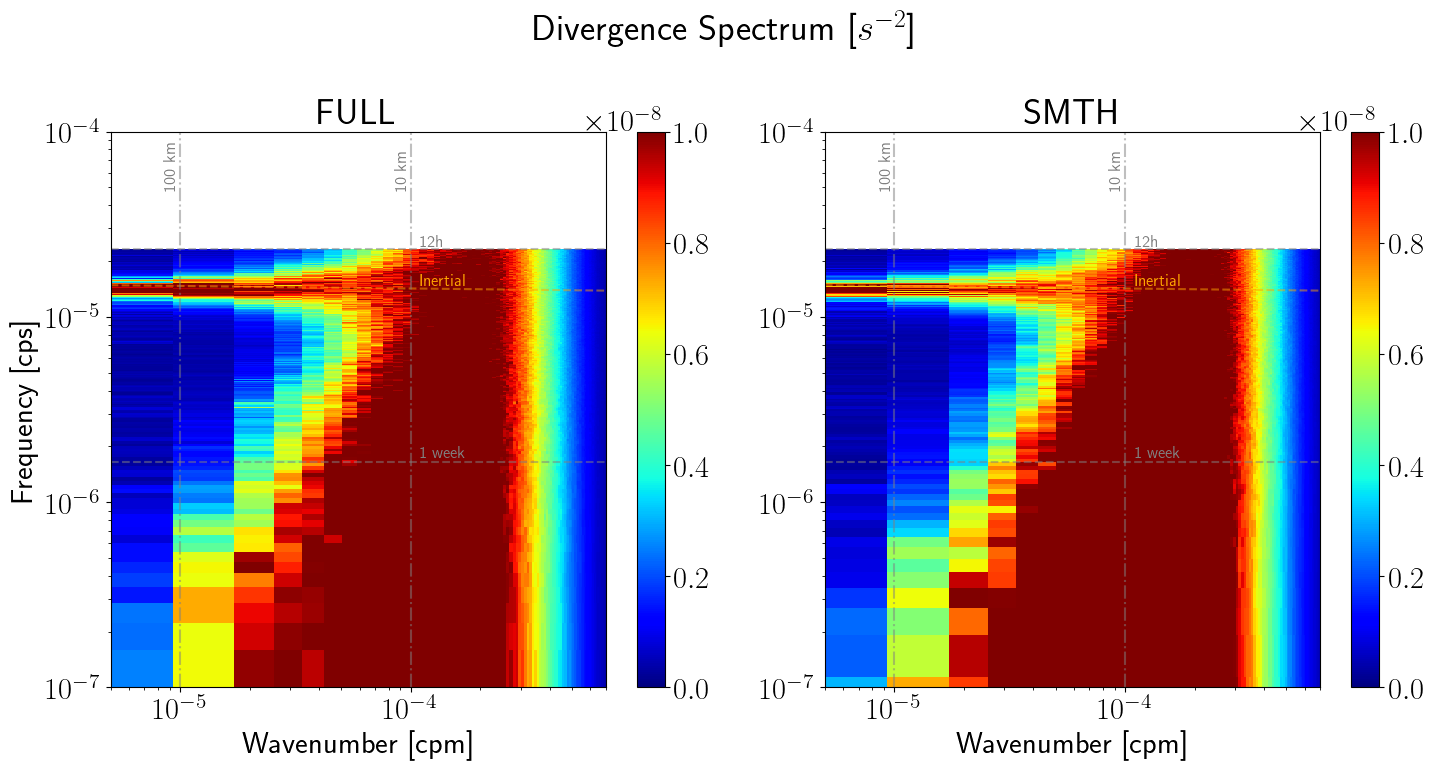

In [84]:
val_min=0
val_max=1e-8
xmin=0.5e-5;xmax=0.7e-3;ymax=1e-4;ymin=1e-7

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.pcolormesh(sigma_iso_full.freq_r/dxx,sigma_iso_full.freq_time_counter,
               ((sigma_iso_full.real)/dxx),vmin=val_min,vmax=val_max,cmap='jet')

'Lines for f'
plt.plot([xmin,xmax],[sw.f(vart.nav_lat_rho.mean()/(2*np.pi)),sw.f(vart.nav_lat_rho.mean())/(2*np.pi)],
         color='orange',linestyle='--',alpha=0.5)
plt.text(1.1e-4,sw.f(vart.nav_lat_rho.mean())/(2*np.pi)+1e-6,
         r'Inertial',color='orange',fontsize=12)
plt.plot([xmin,xmax],[1/(12*60*60),1/(12*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(12*60*60)+1e-6,
         r'12h',color='gray',fontsize=12)
plt.plot([xmin,xmax],[1/(24*7*60*60),1/(24*7*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(24*7*60*60)+1e-7,
         r'1 week',color='gray',fontsize=12)


'Lines for kh'

plt.plot([(1e-4),(1e-4)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-5,0.5e-4,r'10 km',color='gray',fontsize=12,rotation=90)

plt.plot([(1e-5),(1e-5)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-6,0.5e-4,r'100 km',color='gray',fontsize=12,rotation=90)


# plt.plot([(1/(200*1e3)),(1/(200*1e3))],[ymin,xmax],
#          color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
# plt.text(1/(200*1e3) -0.75e-6,0.5e-4,r'200 km',color='gray',fontsize=12,rotation=90)




plt.title('FULL')
plt.colorbar()

plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.ylabel(r'Frequency [cps] ')
plt.xlabel(r'Wavenumber [cpm]')

plt.subplot(1,2,2)

plt.pcolormesh(sigma_iso_smth.freq_r/dxx,sigma_iso_smth.freq_time_counter,
               ((sigma_iso_smth.real)/dxx),vmin=val_min,vmax=val_max,cmap='jet')

plt.plot([xmin,xmax],[sw.f(vart.nav_lat_rho.mean()/(2*np.pi)),sw.f(vart.nav_lat_rho.mean())/(2*np.pi)],
         color='orange',linestyle='--',alpha=0.5)


# plt.fill_between(y1=1.2e-5,y2=1.7e-5,x=EKE_z_smth.freq_r/dxx,color='white',alpha=0.3)

plt.text(1.1e-4,sw.f(vart.nav_lat_rho.mean())/(2*np.pi)+1e-6,
         r'Inertial',color='orange',fontsize=12)
plt.plot([xmin,xmax],[1/(12*60*60),1/(12*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(12*60*60)+1e-6,
         r'12h',color='gray',fontsize=12)
plt.plot([xmin,xmax],[1/(24*7*60*60),1/(24*7*60*60)],
         color='gray',label=r'$\frac{f_o}{2\pi}$',linestyle='--',alpha=0.5)
plt.text(1.1e-4,1/(24*7*60*60)+1e-7,
         r'1 week',color='gray',fontsize=12)


'Lines for kh'

plt.plot([(1e-4),(1e-4)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-5,0.5e-4,r'10 km',color='gray',fontsize=12,rotation=90)

plt.plot([(1e-5),(1e-5)],[ymin,xmax],
         color='gray',label=r'$\frac{f_o}{2\pi}$',alpha=0.5,linestyle='-.')
plt.text(8.5e-6,0.5e-4,r'100 km',color='gray',fontsize=12,rotation=90)

plt.title('SMTH')


plt.colorbar()

plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

plt.suptitle('Divergence Spectrum [$s^{-2}$]')
plt.xlabel(r'Wavenumber [cpm]')
plt.tight_layout()

In [74]:
band_sigma_full=(sigma_iso_full).sel(freq_time_counter=slice(1.39e-5,1.74e-5))
band_sigma_smth=(sigma_iso_smth).sel(freq_time_counter=slice(1.39e-5,1.74e-5))

# band_sigma_full=(sigma_iso_full).sel(freq_time_counter=slice(1.2e-5,1.7e-5))
# band_sigma_smth=(sigma_iso_smth).sel(freq_time_counter=slice(1.2e-5,1.7e-5))

Text(0.5, 0, 'Wavenumber [cpm]')

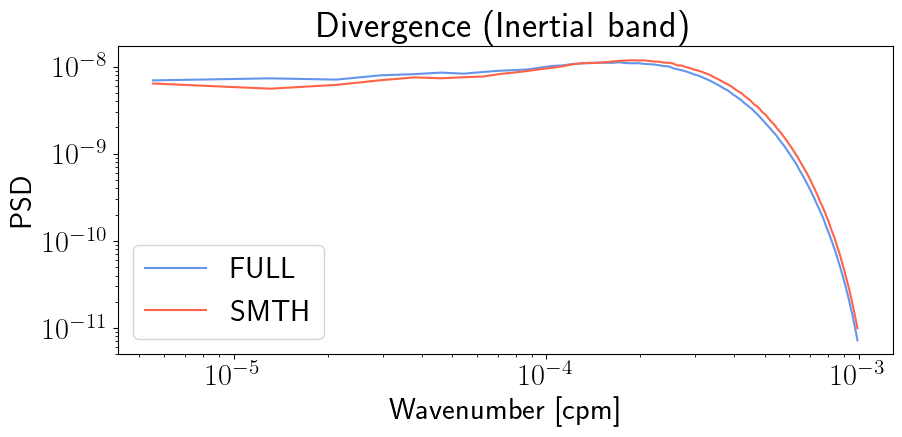

In [75]:
plt.figure(figsize=(10,4))
plt.plot(band_sigma_full.freq_r/dxx,band_sigma_full.mean('freq_time_counter')/dxx,label='FULL',color='cornflowerblue')
plt.plot(band_sigma_smth.freq_r/dxx,band_sigma_smth.mean('freq_time_counter')/dxx,label='SMTH',color='tomato')

plt.legend()
xmin=1e-6;xmax=3e-4
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1e-5,xmax)
# plt.ylim(1e-10,1e-9)

plt.title('Surface divergence (near-inertial)')
plt.ylabel(r'PSD ')
plt.xlabel(r'Wavenumber [cpm]')






# Spectral analysis- Frequency

In [156]:
tau_u_full_spec_t_only=xrft.cross_spectrum(taux_full_time.drop(['time_instant','ocean_time']),
                    u_full_time.drop(['time_instant','ocean_time']),
                    dim=['ocean_time'])

tau_v_full_spec_t_only=xrft.cross_spectrum(tauy_full_time.drop(['time_instant','ocean_time']),
                    v_full_time.drop(['time_instant','ocean_time']),
                    dim=['ocean_time'])

ww_full_spec_t_only=(1/1024)*(tau_u_full_spec_t_only+ tau_u_full_spec_t_only)




tau_u_smth_spec_t_only=xrft.cross_spectrum(taux_smth_time.drop(['time_instant','ocean_time']),
                    u_smth_time.drop(['time_instant','ocean_time']),
                    dim=['ocean_time'])

tau_v_smth_spec_t_only=xrft.cross_spectrum(tauy_smth_time.drop(['time_instant','ocean_time']),
                    v_smth_time.drop(['time_instant','ocean_time']),
                    dim=['ocean_time'])

ww_smth_spec_t_only=(1/1024)*(tau_u_smth_spec_t_only+ tau_u_smth_spec_t_only)



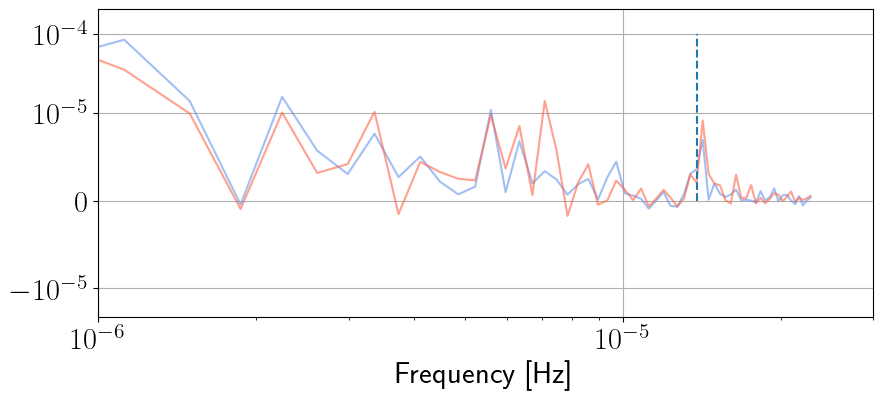

In [159]:
plt.figure(figsize=(10,4))


plt.plot(ww_full_spec_t_only.freq_ocean_time/dtt,
         ww_full_spec_t_only[:,600,340],
         alpha=0.6,label='FULL',color='cornflowerblue')

plt.plot(ww_smth_spec_t_only.freq_ocean_time/dtt,
         ww_smth_spec_t_only[:,600,340],
         alpha=0.6,label='SMTH',color='tomato')


# plt.plot(ww_full_spec_t_only.freq_ocean_time/dtt,
#          ww_full_spec_t_only.mean(['eta_v','xi_u']),
#          alpha=0.6,label='FULL',color='cornflowerblue')

# plt.plot(ww_smth_spec_t_only.freq_ocean_time/dtt,
#          ww_smth_spec_t_only.mean(['eta_v','xi_u']),
#          alpha=0.6,label='SMTH',color='tomato')


plt.plot([sw.f(df.nav_lat_rho.mean())/(2*np.pi),sw.f(df.nav_lat_rho.mean())/(2*np.pi)],[1e-9,1e-4],'--')
# plt.plot([sw.f(df.lat_rho[600,340])/(2*np.pi),sw.f(df.lat_rho[600,340])/(2*np.pi)],[1e-9,1e-4])


plt.grid()

plt.xlabel(r'Frequency [Hz]')
# plt.ylabel(r'Spectrum Density [m$^2$ s$^{-1}$] ')
plt.xlim(1e-6,3e-5)
# plt.plot([sw.f()/(2*np.pi),sw.f()/(2*np.pi)],[1e-9,1e-5])
# plt.plot([np.log10(86400*365),np.log10(86400*365)],[1e-5,1])
plt.xscale('log')
plt.yscale('symlog', linthresh=1e-5)


# plt.ylim(5e-5,1)

### EKE (Central point)

In [23]:
%%time
u_full_psi_c=df.u.xroms.to_grid('psi', 's_rho')[:,:,860,460].compute()
v_full_psi_c=df.v.xroms.to_grid('psi', 's_rho')[:,:,860,460].compute()

u_smth_psi_c=dt.u.xroms.to_grid('psi', 's_rho')[:,:,860,460].compute()
v_smth_psi_c=dt.v.xroms.to_grid('psi', 's_rho')[:,:,860,460].compute()

CPU times: user 9.1 s, sys: 882 ms, total: 9.98 s
Wall time: 11.3 s


In [ ]:
%%time
u_interp_full=u_full_psi_c.xroms.isoslice(z_interp)
v_interp_full=v_full_psi_c.xroms.isoslice(z_interp)

u_interp_smth=u_smth_psi_c.xroms.isoslice(z_interp)
v_interp_smth=v_smth_psi_c.xroms.isoslice(z_interp)

In [25]:
nf=3
wdws='hann' #'flattop','hann'
wdw_cor=True
# scl='spectrum'
scl='density'
dtt=6*60*60
# dtt=6/24

In [ ]:
Vf_spec_f=xrft.power_spectrum(v_interp_full.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)
Uf_spec_f=xrft.power_spectrum(u_interp_full.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)

Vt_spec_f=xrft.power_spectrum(v_interp_smth.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)
Ut_spec_f=xrft.power_spectrum(u_interp_smth.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)


In [ ]:
EKE_full_c_freq=0.5*(Vf_spec_f+ Uf_spec_f)
EKE_smth_c_freq=0.5*(Vt_spec_f+ Ut_spec_f)

In [ ]:
plt.figure(figsize=(10,4))

# plt.plot((EKE_full_c_freq['freq_ocean_time'])/dtt,
#          np.nanmean(EKE_full_c_freq,axis=1)/dtt,
#          alpha=0.6,label='FULL',color='cornflowerblue')
# plt.plot((EKE_smth_c_freq['freq_ocean_time'])/dtt,
#          np.nanmean(EKE_smth_c_freq,axis=1)/dtt,
#          alpha=0.6,label='FULL',color='tomato')

plt.plot((EKE_full_c_freq['freq_ocean_time'])/dtt,
         (EKE_full_c_freq[:,0])/dtt,
         alpha=0.6,label='FULL',color='cornflowerblue')
plt.plot((EKE_smth_c_freq['freq_ocean_time'])/dtt,
         (EKE_smth_c_freq[:,0])/dtt,
         alpha=0.6,label='FULL',color='tomato')

plt.grid()
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Spectrum Density [m$^2$ s$^{-1}$] ')
plt.xlim(1e-7,3e-5)
plt.plot([sw.f()/(2*np.pi),sw.f()/(2*np.pi)],[1e-9,1e-5])
# plt.plot([np.log10(86400*365),np.log10(86400*365)],[1e-5,1])
plt.xscale('log')
plt.yscale('log')
# plt.ylim(5e-5,1)

In [128]:
%%time
month='total'
EKE_full_c_freq.to_netcdf('/homes/metogra/iufarias/Documents/data/new_spec/freq_Eke_full_c_{0}.nc'.format(month))
EKE_smth_c_freq.to_netcdf('/homes/metogra/iufarias/Documents/data/new_spec/freq_Eke_smth_c_{0}.nc'.format(month))

CPU times: user 18.9 ms, sys: 10.7 ms, total: 29.5 ms
Wall time: 129 ms


In [11]:
EKE_full_c_freq=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/freq_Eke_full_c_total.nc')
EKE_smth_c_freq=xr.open_dataarray('/homes/metogra/iufarias/Documents/data/new_spec/freq_Eke_smth_c_total.nc')

## EKE (left)

In [144]:
%%time
u_full_psi_l=df.u[:,:,440,360].compute()
v_full_psi_l=df.v[:,:,440,360].compute()

u_smth_psi_l=dt.u[:,:,440,360].compute()
v_smth_psi_l=dt.v[:,:,440,360].compute()

CPU times: user 49.1 s, sys: 4.91 s, total: 54 s
Wall time: 2min 9s


In [145]:
%%time
u_interp_full_l=u_full_psi_l.xroms.isoslice(z_interp)
v_interp_full_l=v_full_psi_l.xroms.isoslice(z_interp)

u_interp_smth_l=u_smth_psi_l.xroms.isoslice(z_interp)
v_interp_smth_l=v_smth_psi_l.xroms.isoslice(z_interp)

CPU times: user 5.71 s, sys: 139 ms, total: 5.85 s
Wall time: 5.78 s


In [ ]:
Vf_spec_f_l=xrft.power_spectrum(v_interp_full_l.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)
Uf_spec_f_l=xrft.power_spectrum(u_interp_full_l.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)

Vt_spec_f_l=xrft.power_spectrum(v_interp_smth_l.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)
Ut_spec_f_l=xrft.power_spectrum(u_interp_smth_l.drop(['time_instant', 'z_rho_psi','ocean_time']),
                                  dim=['ocean_time'],
                          nfactor=nf,truncate='True',scaling=scl,detrend='linear', 
                                 window=wdws,window_correction=wdw_cor)


In [ ]:
EKE_full_l_freq=0.5*(Vf_spec_f_l+ Uf_spec_f_l)
EKE_smth_l_freq=0.5*(Vt_spec_f_l+ Ut_spec_f_l)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot((EKE_full_l_freq['freq_ocean_time'])/dt,
         np.nanmean(EKE_full_c_freq,axis=1)/dt,
         alpha=0.6,label='FULL',color='cornflowerblue')
plt.plot((EKE_smth_l_freq['freq_ocean_time'])/dt,
         np.nanmean(EKE_smth_c_freq,axis=1)/dt,
         alpha=0.6,label='FULL',color='tomato')
plt.grid()
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Spectrum Density [m$^2$ s$^{-1}$] ')
plt.xlim(1e-7,3e-5)
# plt.plot([np.log10(86400*365),np.log10(86400*365)],[1e-5,1])
plt.xscale('log')
plt.yscale('log')
# plt.ylim(5e-5,1)